In [2]:
G_path = '/Users/sepehrbe/My_Drive/DataSources/SkinCare'
G_saved = G_path+ '/Saved/'
G_Grid = G_path+ '/Saved/Grid_Search_Results'
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import torch.nn.functional as F
from CNN_NETs import CNN_Nets
pd.options.display.max_colwidth = 300

def plot_grid_results(model_):
    epochs_X = [i for i in range(1, len( list(model_['train_epoch_loss'])[0]) +1)]
    fig, axs = plt.subplots(1,2,figsize=(14,4))
    axs[0].plot(epochs_X , list(model_.train_epoch_loss)[0] , 'bo-', label='Train loss')
    axs[0].plot(epochs_X , list(model_.valid_epoch_loss)[0],'ro-', label='Validation loss')
    axs[0].plot(epochs_X , list(model_.test_epoch_loss)[0],'go-', label='Test loss')
    axs[0].set_xlabel("Epochs", fontsize = 12)
    axs[0].set_ylabel("Loss", fontsize = 12)
    axs[0].grid()
    axs[0].legend()
    axs[0].set_title('Train and Validation loss by epochs', fontsize = 14)
    axs[1].plot(epochs_X , list(model_.train_epoch_acc)[0] , 'bo-', label='Train Accuracy')
    axs[1].plot(epochs_X , list(model_.valid_epoch_acc)[0] ,'ro-', label='Validation Accuracy')
    axs[1].plot(epochs_X , list(model_.test_epoch_acc)[0] ,'go-', label='Test Accuracy')
    axs[1].set_xlabel("Epochs", fontsize = 12)
    axs[1].set_ylabel("Accuracy", fontsize = 12)
    axs[1].grid()
    axs[1].legend()
    axs[1].set_title('Train and Validation Accuracy by epochs', fontsize = 14)
    plt.show()

In [15]:
f = "CNN_280x210_Model7_21_Jun22_13-37"
# f = '280x210_20_Jun_2022_21-50.csv'
f = 'AtuoEncoder_20_Jun_2022_21-50.pkl'
# f = 'CNN_280x210_Model3_21_Jun22_15-01'
f = '280x210_21_Jun_2022_01-36.pkl'
f = '280x210_21_Jun_2022_01-01.pkl'

try: GridSrach = pickle.load(open(G_Grid + '/' + f , 'rb'))
except: GridSrach = pd.read_csv(G_Grid + '/' + f)

GridSrach['test_metric'] = (GridSrach['test_accuracy'] + GridSrach['test_recall'] + GridSrach['blc_test_recall']) / 3

GridSrach.sort_values('test_metric', ascending=False, inplace=True)

Hyper params:      {'Drop': 0.2, 'LR': 0.001, 'Momentum': 0.8, 'Net': <class 'CNN_NETs.CNN_Nets.Net8_b'>, 'batch_size': 24, 'epochs': 75, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0.0001}
Name: hyper_param, dtype: object
Test overall Metric  0.5946459627192446
Test Accuracy  0.6117936117936118
Simple Avg. Test recall:  0.6197633239831698
Balanced test Recall :  0.5523809523809523


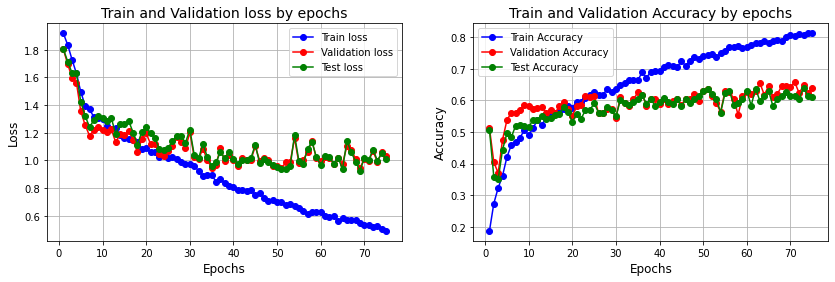

Hyper params:      {'Drop': 0.2, 'LR': 0.001, 'Momentum': 0.8, 'Net': <class 'CNN_NETs.CNN_Nets.Net8_a'>, 'batch_size': 24, 'epochs': 75, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0.0001}
Name: hyper_param, dtype: object
Test overall Metric  0.5917689589007963
Test Accuracy  0.5945945945945946
Simple Avg. Test recall:  0.6188075202030322
Balanced test Recall :  0.5619047619047619


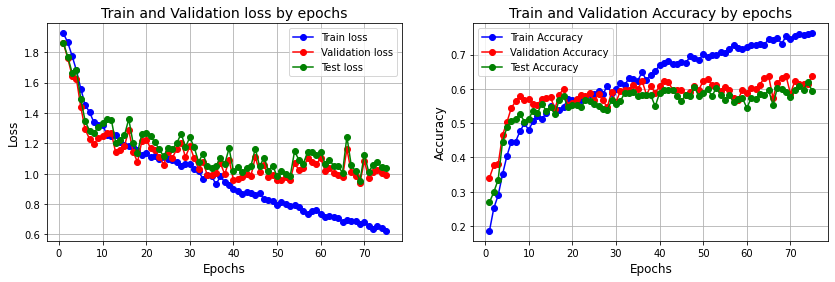

In [16]:
n = range(GridSrach.shape[0])
for i in n:
    details_ = GridSrach.iloc[[i]]
    print('Hyper params: ', details_.hyper_param.iloc[[0]])
    print('Test overall Metric ', details_.test_metric[0])
    print('Test Accuracy ', details_.test_accuracy[0])
    print('Simple Avg. Test recall: ', details_.test_recall[0])
    print('Balanced test Recall : ', details_.blc_test_recall[0])
    plot_grid_results(details_)

Hyper params:      {'Drop': 0.2, 'LR': 0.001, 'Momentum': 0.8, 'Net': <class 'CNN_NETs.CNN_Nets.Net8_b'>, 'batch_size': 24, 'epochs': 100, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0.0001}
Name: hyper_param, dtype: object
Test Accuracy  0.6461916461916462
Simple Avg. Test recall:  0.6237136568044702
Balanced test Recall :  0.5904761904761904


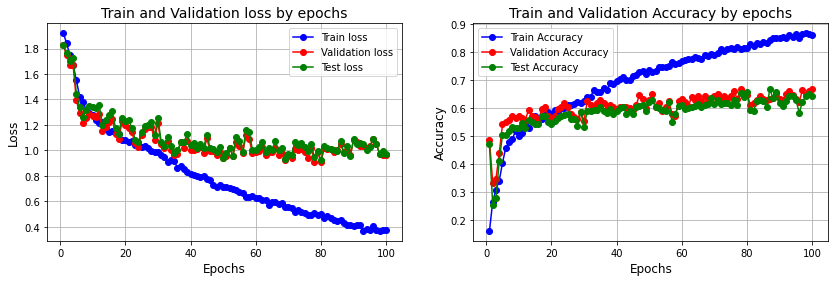

Hyper params:      {'Drop': 0.2, 'LR': 0.001, 'Momentum': 0.8, 'Net': <class 'CNN_NETs.CNN_Nets.Net8'>, 'batch_size': 24, 'epochs': 100, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'weight_decay': 0.0001}
Name: hyper_param, dtype: object
Test Accuracy  0.6363636363636364
Simple Avg. Test recall:  0.6122039393129857
Balanced test Recall :  0.6


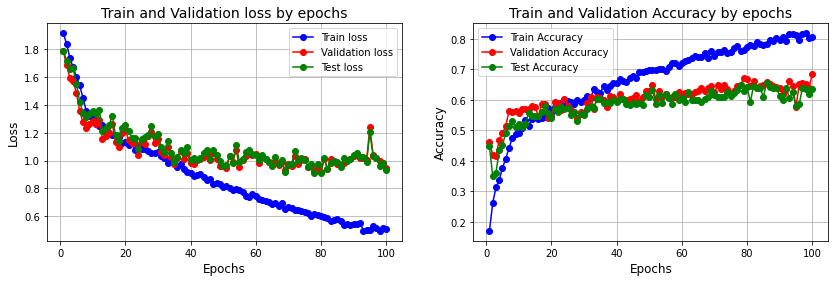

In [123]:
n = range(GridSrach.shape[0])
for i in n:
    details_ = GridSrach.iloc[[i]]
    print('Hyper params: ', details_.hyper_param.iloc[[0]])
    print('Test Accuracy ', details_.test_accuracy[0])
    print('Simple Avg. Test recall: ', details_.test_recall[0])
    print('Balanced test Recall : ', details_.blc_test_recall[0])
    plot_grid_results(details_)